# Unidad 1 Tarea
    José Luis González Ibarra #17130033
    Héctor Arrellano Ramírez #18130533
    Diego Medrano Diez #19131573
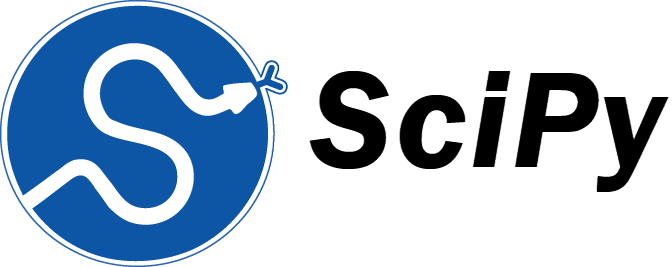

In [1]:
import numpy as np #Importamos libreria numpy
import matplotlib.pyplot as plt #Importamos matplotlib.pyplot pon tipo como un Matlab
import scipy as sp #Importamos scipy

<h2 style='text-align: center;'> Optimización - Distribucion</h2>

In [2]:
from scipy.optimize import minimize

In [3]:
def f(x):
    return (x-3)**2
res = minimize(f,2)

In [4]:
res

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [5]:
res.x

array([2.99999999])

In [6]:
#
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
    -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))
bounds = [(-512, 512), (-512, 512)]

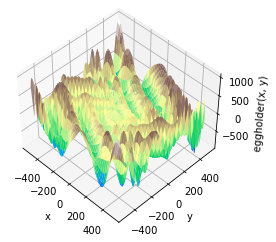

In [7]:
import matplotlib.pyplot as plt #importamos la libereria matplot 
from mpl_toolkits.mplot3d import Axes3D #importamos graficas con 3 ejes. 

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

In [8]:
from scipy import optimize
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

     fun: -935.3379515604948
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 47
     nit: 2
   nlfev: 42
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097554, 453.97741501])
      xl: array([[439.48097554, 453.97741501]])

# Estimaciones

<h2 style='text-align: center;'> Interpolación </h2>

C:\Users\Dell\AppData\Local\Temp/ipykernel_19100/822777425.py:5: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  x = sp.linspace(0,3,10)
C:\Users\Dell\AppData\Local\Temp/ipykernel_19100/822777425.py:7: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  y = sp.exp(-x/3.0)
C:\Users\Dell\AppData\Local\Temp/ipykernel_19100/822777425.py:11: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  x2 = sp.linspace(0,3,1000)


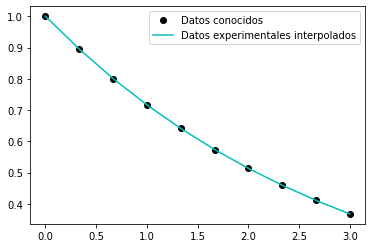

In [9]:
import scipy as sp
from scipy import interpolate
import matplotlib.pyplot as plt
#array
x = sp.linspace(0,3,10)
# generamos datos experimentales de ejemplo)
y = sp.exp(-x/3.0)
# Interpol
interpolacion = interpolate.interp1d(x, y)
# array con mas puntos en el mismo intervalo
x2 = sp.linspace(0,3,1000)
# Evaluamos x2 en la interpolacion
y2 = interpolacion(x2)
plt.figure
plt.plot(x, y, 'ok')
plt.plot(x2, y2, '-c')
plt.legend(('Datos conocidos', 'Datos experimentales interpolados'))
plt.show()

<h2 style='text-align: center;'> Derivada central del punto </h2> 

In [37]:
#Ponderaciones de retorno para una derivada central de punto Np.
from scipy.misc import central_diff_weights
def f(x):
    return 2 * x**2 + 3
x = 3.0 # Punto derivado
h = 0.1 # Paso diferencial
Np = 3 # Número de punto para la derivada central
weights = central_diff_weights(Np) # Pesos para la primera derivada
vals = [f(x + (i - Np/2) * h) for i in range(Np)]
sum(w * v for (w, v) in zip(weights, vals))/h

11.79999999999998

<h2 style='text-align: center;'> Electrocardiograma de una señal 1-D </h2>

In [46]:
#Cargue un electrocardiograma como ejemplo de una señal 1-D.
from scipy.misc import electrocardiogram
ecg = electrocardiogram()
ecg
array([-0.245, -0.215, -0.185, ..., -0.405, -0.395, -0.385])
ecg.shape, ecg.mean(), ecg.std()

((108000,), -0.16510875, 0.5992473991177294)

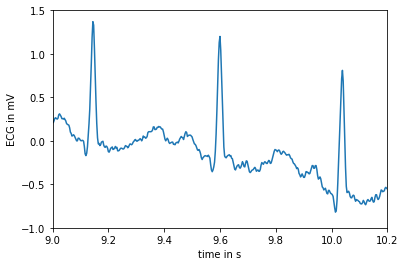

In [47]:
#La señal devuelta es un electrocardiograma (ECG) de 5 minutos de duración, 
#un registro médico de la actividad eléctrica del corazón, muestreado a 360 Hz.
import matplotlib.pyplot as plt
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.show()

# Distribuciones

<h2 style='text-align: center;'> Distribucion Beta </h2>

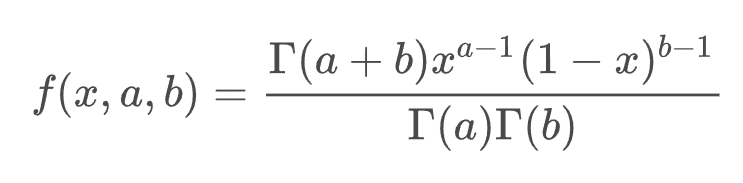 0 ≤ x ≤ 1 

In [34]:
#Documentación: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html
from scipy.stats import beta

In [11]:
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a,b, moments='mvsk')

In [31]:
beta.ppf?

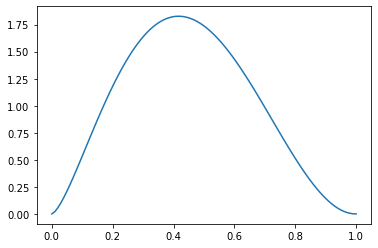

In [36]:
#0 pertenece infinito -  y 1 pertenece infinito + 
#PPF - Percent Point Function
x = np.linspace(beta.ppf(0, a  , b),beta.ppf(1, a  , b), 100)
plt.plot(x, beta.pdf(x,a, b))

<h2 style='text-align: center;'> Distribucion Gaussiana </h2>

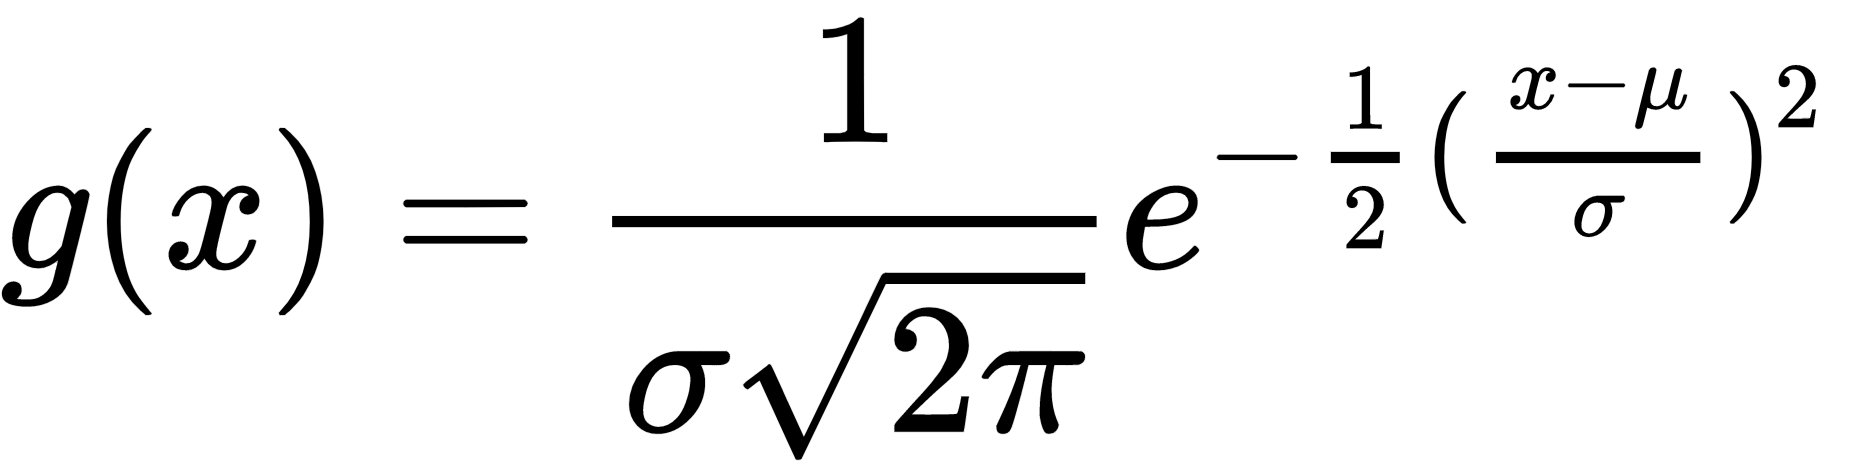

In [35]:
#Documentación: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html?highlight=norm#scipy.stats.norm
from scipy.stats import norm

In [24]:
mu = 1 
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv')

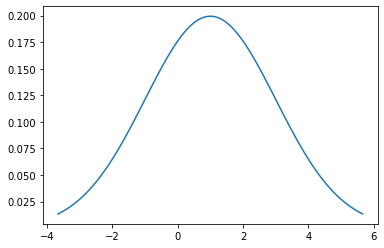

In [26]:
x = np.linspace(norm.ppf(0.01, mu, sigma),norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))

<h2 style='text-align: center;'> Distribucion Multinomial  </h2>

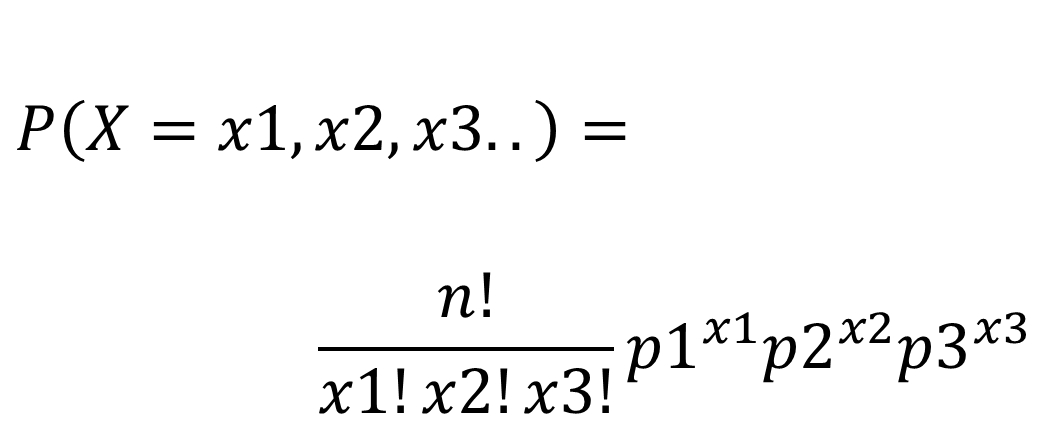

In [29]:
from scipy.stats import multinomial
p = np.ones(6)/6
#pmf función de probabilidad de masa
multinomial.pmf([6,0,0,0,0,0],n=6,p=p)

2.143347050754453e-05

In [30]:
multinomial.rvs(n=100,p=p, size=5)
#Rodo el dado 100 veces y tengo 6 probabilades.Todo es random. 

array([[15, 16, 16, 16, 20, 17],
       [13, 18, 15, 17, 21, 16],
       [12, 15, 16, 19, 14, 24],
       [16, 12, 16, 19, 19, 18],
       [15, 23, 11, 20,  9, 22]])

# Clustering

In [18]:
#Importamos numy y scipy con cluster.
from numpy import array
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt
features  = array([[ 1.9,2.3],
                   [ 1.5,2.5],
                   [ 0.8,0.6],
                   [ 0.4,1.8],
                   [ 0.1,0.1],
                   [ 0.2,1.8],
                   [ 2.0,0.5],
                   [ 0.3,1.5],
                   [ 1.0,1.0]])
whitened = whiten(features)
book = np.array((whitened[0],whitened[2]))
kmeans(whitened,book)

(array([[2.45121811, 3.03653641],
        [0.98872663, 1.31944737]]),
 0.9088234961964715)

In [14]:
codes = 3
kmeans(whitened,codes)

(array([[0.4325679 , 2.15087996],
        [2.45121811, 3.03653641],
        [1.40584568, 0.69587293]]),
 0.5511808116483707)

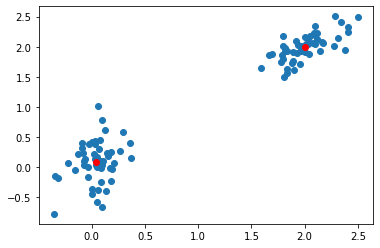

In [17]:
#Crea 50 datapoints con dos clusters a y b
pts = 50
rng = np.random.default_rng()
a = rng.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = rng.multivariate_normal([30, 10],
                            [[10, 2], [2, 1]],
                            size=pts)
features = np.concatenate((a, b))
# Limpia los datos
whitened = whiten(features)
# Encuentra los dos clusters en los datos
codebook, distortion = kmeans(whitened, 2)
# Trazar datos blanqueados y centros de clústeres en rojo
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

# Distancias

In [20]:
#Importamos scipy y usando las submodulo de distancias.
from scipy.spatial import distance
coords = [(35.0456, -85.2672),
          (35.1174, -89.9711),
          (35.9728, -83.9422),
          (36.1667, -86.7833)]
distance.cdist(coords, coords, 'euclidean')

array([[0.        , 4.70444794, 1.6171966 , 1.88558331],
       [4.70444794, 0.        , 6.0892811 , 3.35605413],
       [1.6171966 , 6.0892811 , 0.        , 2.84770898],
       [1.88558331, 3.35605413, 2.84770898, 0.        ]])

<h2 style='text-align: center;'> Directed Hausdorff  </h2>

In [22]:
#Importación de submodulo de distancias con directed_hausdorff. El directed_hausdorff  es calcular  distancia de Hausdorff 
#dirigida entre dos matrices 2-D.
from scipy.spatial.distance import directed_hausdorff
u = np.array([(1.0, 0.0),
              (0.0, 1.0),
              (-1.0, 0.0),
              (0.0, -1.0)])
v = np.array([(2.0, 0.0),
              (0.0, 2.0),
              (-2.0, 0.0),
              (0.0, -4.0)])
directed_hausdorff(u, v)[0]

2.23606797749979

<h2 style='text-align: center;'> Bray-Curtis </h2>

In [25]:

#Calcular la distancia de Bray-Curtis entre dos matrices 1-D.
from scipy.spatial import distance
distance.braycurtis([1, 0, 0], [0, 1, 0])

1.0

<h2 style='text-align: center;'> Kulsinski </h2>

In [34]:
#Calcule la disimilitud de Kulsinski entre dos matrices booleanas 1-D.
from scipy.spatial import distance
p1 = distance.kulsinski([1, 0, 0], [0, 1, 0])
print(p1)
p2 = distance.kulsinski([1, 0, 0], [1, 1, 0])
print(p2)
p3 = distance.kulsinski([1, 0, 0], [2, 1, 0])
print(p3)
p4 = distance.kulsinski([1, 0, 0], [3, 1, 0])
print(p4)

1.0
0.75
0.3333333333333333
-0.5


# Correlaciones

In [24]:
#Las líneas de la matriz a lo largo del eje dado están correlacionadas con los pesos dados.
from scipy.ndimage import correlate1d
correlate1d([2, 8, 0, 4, 1, 9, 9, 0], weights=[1, 3])
array([ 8, 26,  8, 12,  7, 28, 36,  9])

array([ 8, 26,  8, 12,  7, 28, 36,  9])

<h2 style='text-align: center;'> Filtro Gaussiano Multidimensiona </h2>

In [28]:
# Filtro gaussiano multidimensional.
#Un filtro gaussiano es un filtro de paso 
#bajo que se utiliza para reducir el ruido(componentes de alta frecuencia) y las regiones borrosas de una imagen.
from scipy.ndimage import gaussian_filter
a = np.arange(50, step=2).reshape((5,5))
a
array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28],
       [30, 32, 34, 36, 38],
       [40, 42, 44, 46, 48]])
gaussian_filter(a, sigma=1)
array([[ 4,  6,  8,  9, 11],
       [10, 12, 14, 15, 17],
       [20, 22, 24, 25, 27],
       [29, 31, 33, 34, 36],
       [35, 37, 39, 40, 42]])

array([[ 4,  6,  8,  9, 11],
       [10, 12, 14, 15, 17],
       [20, 22, 24, 25, 27],
       [29, 31, 33, 34, 36],
       [35, 37, 39, 40, 42]])

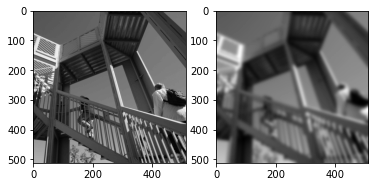

In [29]:
from scipy import misc
import matplotlib.pyplot as plt
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = gaussian_filter(ascent, sigma=5)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

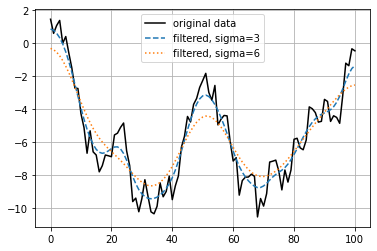

In [32]:
# Filtro Gaussian en una 1 dimensión.
from scipy.ndimage import gaussian_filter1d
gaussian_filter1d([1.0, 2.0, 3.0, 4.0, 5.0], 1)
array([ 1.42704095,  2.06782203,  3.        ,  3.93217797,  4.57295905])
gaussian_filter1d([1.0, 2.0, 3.0, 4.0, 5.0], 4)
array([ 2.91948343,  2.95023502,  3.        ,  3.04976498,  3.08051657])
import matplotlib.pyplot as plt
rng = np.random.default_rng()
x = rng.standard_normal(101).cumsum()
y3 = gaussian_filter1d(x, 3)
y6 = gaussian_filter1d(x, 6)
plt.plot(x, 'k', label='original data')
plt.plot(y3, '--', label='filtered, sigma=3')
plt.plot(y6, ':', label='filtered, sigma=6')
plt.legend()
plt.grid()
plt.show()